In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bikes_rent.csv')
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

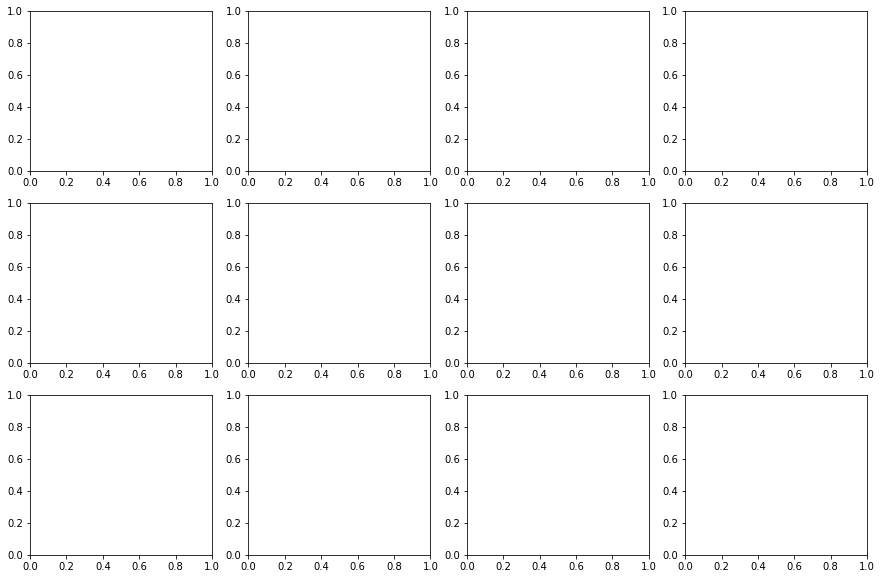

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx/9, idx/9])

Блок 1. Ответьте на вопросы (каждый 0.5 балла):

Каков характер зависимости числа прокатов от месяца?
ответ: квадратичная зависимость.
Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
ответ: temp(температура в Цельсиях), atemp(температура по ощущениям в Цельсиях).

In [39]:
df[df.columns[:-1]].corrwith(df['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [40]:
df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [41]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [42]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [43]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [44]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
for feature, coef in zip(df.columns, linear_regressor.coef_):
    print ('%s: %f' % (feature, coef))

season: 570.865954
yr: 1021.965874
mnth: -141.301029
holiday: -86.756586
weekday: 137.223034
workingday: 56.393693
weathersit: -330.228163
temp: 367.479222
atemp: 585.554695
hum: -145.612324
windspeed(mph): 12457576985764.572266
windspeed(ms): -12457576985963.025391


In [47]:
from sklearn.linear_model import Lasso, Ridge

In [49]:
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)
for feature, coef in zip(df.columns, lasso_regressor.coef_):
    print( '%s: %f' % (feature, coef))

season: 560.241616
yr: 1019.463494
mnth: -128.730627
holiday: -86.152781
weekday: 137.347894
workingday: 55.212371
weathersit: -332.369857
temp: 376.363236
atemp: 576.530794
hum: -144.129155
windspeed(mph): -197.139689
windspeed(ms): -0.000000


In [50]:
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
for feature, coef in zip(df.columns, ridge_regressor.coef_):
    print ('%s: %f' % (feature, coef))

season: 563.064572
yr: 1018.948379
mnth: -131.873320
holiday: -86.746098
weekday: 138.005111
workingday: 55.903110
weathersit: -332.349788
temp: 386.457889
atemp: 566.347047
hum: -145.071327
windspeed(mph): -99.259441
windspeed(ms): -99.259441


In [51]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for idx, a in enumerate(alphas):
    lasso_regressor = Lasso(alpha=a)
    lasso_regressor.fit(X, y)
    coefs_lasso[idx] = lasso_regressor.coef_

    ridge_regressor = Ridge(alpha=a)
    ridge_regressor.fit(X, y)
    coefs_ridge[idx] = ridge_regressor.coef_

Text(0.5,1,'Ridge')

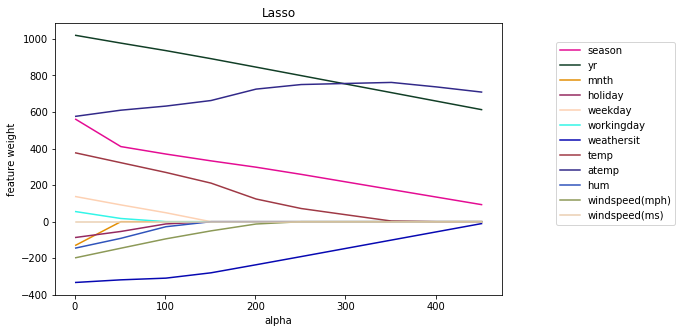

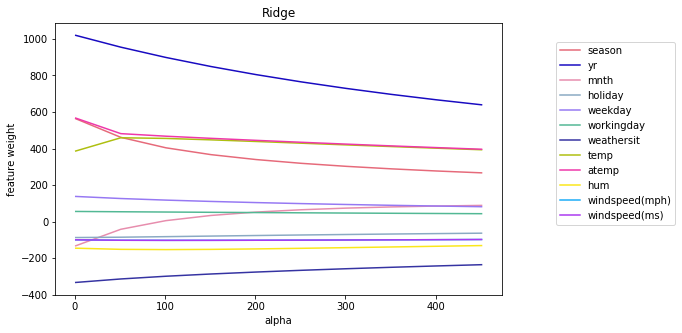

In [52]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Блок 2. Ответьте на вопросы (каждый 0.25 балла):

Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
Ответ: L1-регуляризатор (Lasso).
Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
Ответ: Чем больше значения коэффициента alpha, тем менее сложные модели будут получаться.
Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Ситается, что регуляризатор исключает признак, если коэффициент при нем < 1e-3.
Ответ: Lasso - да, Ridge - нет.
Какой из регуляризаторов подойдет для отбора неинформативных признаков?
Ответ: L1-регуляризатор (Lasso).

In [54]:
from sklearn.linear_model import LassoCV

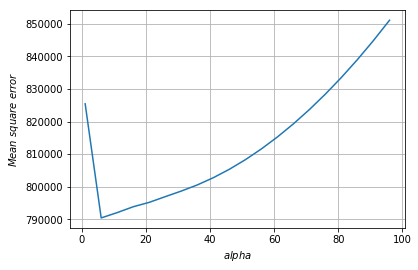

Выбранное значение параметра регуляризации: 6

season: 532.018983
yr: 1015.060223
mnth: -100.039526
holiday: -83.293960
weekday: 132.504465
workingday: 51.557086
weathersit: -330.559857
temp: 370.679855
atemp: 581.396931
hum: -140.007406
windspeed(mph): -191.771408
windspeed(ms): -0.000000


In [58]:
alphas = np.arange(1, 100, 5)
lasso_cv_regressor = LassoCV(alphas=alphas, cv=3)
lasso_cv_regressor.fit(X, y)
plt.plot(lasso_cv_regressor.alphas_, lasso_cv_regressor.mse_path_.mean(axis=1)) 
plt.xlabel('$alpha$') 
plt.ylabel('$Mean\ square\ error$') 
plt.grid(True)
plt.show() 

print( 'Выбранное значение параметра регуляризации: %d\n' % lasso_cv_regressor.alpha_)
for feature, coef in zip(df.columns, lasso_cv_regressor.coef_):
    print( '%s: %f' % (feature, coef))

alpha(k=1): 41
alpha(k=2): 6
alpha(k=3): 1


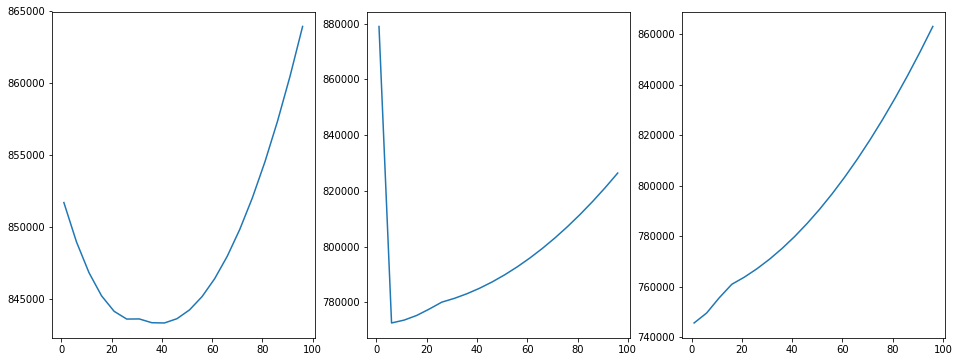

In [59]:
np.hstack((lasso_cv_regressor.mse_path_, np.reshape(lasso_cv_regressor.alphas_, (20, 1))))
df = pd.DataFrame(np.hstack((lasso_cv_regressor.mse_path_, np.reshape(lasso_cv_regressor.alphas_, (20, 1)))))
print ('alpha(k=1): %d' % (df[df[0] == df[0].min()][3]))
print ('alpha(k=2): %d' % (df[df[1] == df[1].min()][3]))
print ('alpha(k=3): %d' % (df[df[2] == df[2].min()][3]))

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
ax=axes[0].plot(lasso_cv_regressor.alphas_, lasso_cv_regressor.mse_path_[:, 0])
ax=axes[1].plot(lasso_cv_regressor.alphas_, lasso_cv_regressor.mse_path_[:, 1])
ax=axes[2].plot(lasso_cv_regressor.alphas_, lasso_cv_regressor.mse_path_[:, 2])


Блок 3. Ответьте на вопросы (каждый 0.5 балла):

В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей cnt от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость cnt от этих признаков по графикам?
Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды?

Ответ: season: 1 - весна, 2 - лето, 3 - осень, 4 - зима, yr: 0 - 2011, 1 - 2012, temp: температура в Цельсиях, atemp: температура по ощущениям в Цельсиях.
                    Для yr, temp и atemp видна возрастающая линейная зависимость. Логично утверждать, что чем больше значение этих признаков, тем больше людей захотят взять велосипеды.
                    
Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации.
Видна ли убывающая линейная зависимость?
Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?

Ответ: weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман), hum: влажность, windspeed(mph): скорость ветра в милях в час. Убывающая линейная зависимость выражена слабо. Логично утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды.

Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). 
Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? 
Верно ли, что они никак не влияют на спрос на велосипеды?

Ответ: windspeed(ms): скорость ветра в метрах в секунду. Совпадает с windspeed(mph): скорость ветра в милях в час, просто перевод одних единиц в другие.